In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

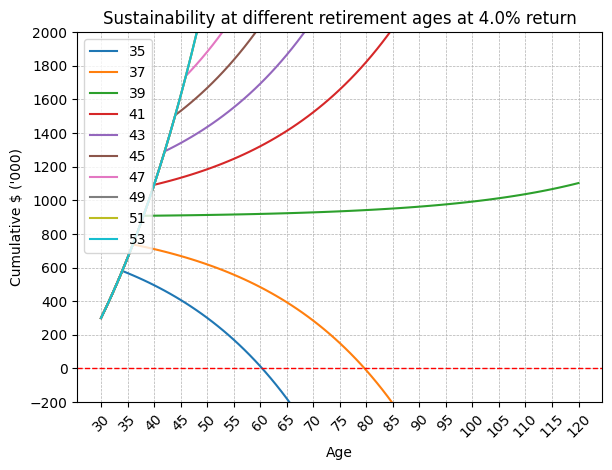

In [ ]:
init_age=30
final_age = 121
retirement_age_list = list(range(35,55,2))

returnedcapital=1.04 # this means 2% real return
yearly_income = 90 # in thousands
yearly_expense = 36 # in thousands
init_cumulative = 300 # in thousands
age = [i for i in  range(init_age,final_age)]
expenses = [yearly_expense] * (final_age-init_age-1)
expenses.insert(0,0)

def create_df(retirement_age):
    income = [yearly_income] * (retirement_age-init_age-1)
    zeroincome = [0] * (final_age-retirement_age)
    income.insert(0,0)
    income.extend(zeroincome)

    df = pd.DataFrame(columns=['age','income','expenses','cumulative'])
    df['age']=age
    df['expenses']=expenses
    df['income']=income
    cum_calc = []
    for i in range(len(df)):
        if i == 0:
            cum_calc.append(init_cumulative)
        else:
            cum_calc.append((cum_calc[i-1]*returnedcapital) + df.loc[i,'income'] - df.loc[i, 'expenses'])

    df['cumulative'] = cum_calc
    return df

#fig, ax = plt.subplots(figsize=(10, 6))  # Increase width and height
#plt.yscale('log') # toggle if needed, but messes up other things

for retirement_age in retirement_age_list:
    df = create_df(retirement_age)
    plt.plot(df['age'],df['cumulative'],label=retirement_age)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Cumulative $ (\'000)')
plt.title(f'Sustainability at different retirement ages at {round((returnedcapital-1),2)*100}% return')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.ylim(bottom=-200,top=2000)
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
#plt.savefig(f'Sustainability {init_cumulative}k inc {yearly_income}k exp {yearly_expense}k at {round((returnedcapital-1),2)*100} percent.png', dpi=300)
plt.show()

In [60]:
pd.set_option('display.max_rows', None)
df

,age,income,expenses,cumulative
0,30,0,0,300
1,31,90,36,366
2,32,90,36,435
3,33,90,36,506
4,34,90,36,580
5,35,90,36,657
6,36,90,36,738
7,37,90,36,821
8,38,90,36,908
9,39,90,36,998


In [ ]:
from http.server import BaseHTTPRequestHandler
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib
matplotlib.use('Agg')  # Force non-interactive backend
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import io
import base64
from urllib.parse import parse_qs, urlparse

def create_df(retirement_age):
        income = [yearly_income] * (retirement_age-init_age-1)
        zeroincome = [0] * (final_age-retirement_age)
        income.insert(0,0)
        income.extend(zeroincome)

        df = pd.DataFrame(columns=['age','income','expenses','cumulative'])
        df['age']=age
        df['expenses']=expenses
        df['income']=income
        cum_calc = []
        for i in range(len(df)):
            if i == 0:
                cum_calc.append(init_cumulative)
            else:
                cum_calc.append((cum_calc[i-1]*returnedcapital) + df.loc[i,'income'] - df.loc[i, 'expenses'])

        df['cumulative'] = cum_calc
        return df

class handler(BaseHTTPRequestHandler):
    def do_GET(self):
        try:
            # Parse query parameters
            parsed_url = urlparse(self.path)
            query_params = parse_qs(parsed_url.query)

            # Extract parameters (with defaults if not provided)
            name = query_params.get('name', ['Unknown'])[0]
            try:
                age = float(query_params.get('age', ['30'])[0])
                retage = float(query_params.get('retage', ['60'])[0])
                returns = float(query_params.get('returns', ['1.02'])[0])
                income = float(query_params.get('income', ['90'])[0])
                expenses = float(query_params.get('expenses', ['36'])[0])
                init = float(query_params.get('init', ['100'])[0])
            except ValueError:
                age, retage, returns, income, expenses, init = 30, 60,1.02,90,36,100  # Fallback defaults for invalid inputs
            '''
            query = request.get("query", {})
            name = query.get("age", "retage", "returns", "income", "expenses", "init")
            '''
            init_age=age
            final_age = 121
            retirement_age_list = list(range(45,70,5))

            returnedcapital=returns
            yearly_income = income
            yearly_expense = expenses
            init_cumulative = init
            age = [i for i in  range(init_age,final_age)]
            expenses = [yearly_expense] * (final_age-init_age-1)
            expenses.insert(0,0)

            for retirement_age in retirement_age_list:
                df = create_df(retirement_age)
                plt.plot(df['age'],df['cumulative'],label=retirement_age)

            plt.grid(True, which='both', linestyle='--', linewidth=0.5)

            plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='run out of $')
            plt.xlabel('Age')
            plt.xticks(rotation=45)
            plt.ylabel('Cumulative $ (\'000) (log scale)')
            plt.title('Sustainability at different retirement ages')
            plt.legend()
            plt.ylim(bottom=-1000,top=3000) # hides anything below y=0
            ax = plt.gca() # get current axis
            ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  
            ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
            #plt.savefig('Retirement funds.png', dpi=300)

            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            plt.close()

             # Encode image as base64
            image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
            buf.close()

            # Send response
            image_bytes = buf.read()
            return {
                "statusCode": 200,
                "headers": {
                    "Content-Type": "image/png"
                },
                "body": image_bytes,
                "isBase64Encoded": True
    }
            '''
            self.send_response(200)
            self.send_header('Content-Type', 'image/png')
            self.end_headers()
            self.wfile.write(base64.b64decode(image_base64))
            '''

        except Exception as e:
            # Log error and return 500
            return {
                "statusCode": 500,
                "headers": {
                    "Content-Type": "text/plain"
                },
                "body": f"Internal Server Error: {str(e)}".encode('utf-8'),
                "isBase64Encoded": False
    }       
            '''
            self.send_response(500)
            self.send_header('Content-Type', 'text/plain')
            self.end_headers()
            self.wfile.write(f"Internal Server Error: {str(e)}".encode('utf-8'))
            '''
        
        #return

In [ ]:
<body>
  <h1>Enter Parameters</h1>
  <input type="number" id="age" placeholder="Age" required/>
  <input type="number" id="retage" placeholder="Retirement Age" required/>
  <input type="number" id="returns" placeholder="Real returns (%)" required/>
  <input type="number" id="income" placeholder="Yearly Income" required/>
  <input type="number" id="expenses" placeholder="Yearly Expenses" required/>
  <input type="number" id="init" placeholder="Initial Capital" required/>
  <button onclick="run_function()">Generate Image</button>
  <br><br>
  <img id="resultImage" alt="Your Image Will Appear Here" />

  <script>
    async function run_function() {
      const age = document.getElementById('age').value;
      const retage = document.getElementById('retage').value;
      const returns = document.getElementById('returns').value;
      const income = document.getElementById('income').value;
      const expenses = document.getElementById('expenses').value;
      const init = document.getElementById('init').value;

      const url = `/api/main?age=${encodeURIComponent(age)}&retage=${encodeURIComponent(retage)}&returns=${encodeURIComponent(returns)}&income=${encodeURIComponent(income)}&expenses=${encodeURIComponent(expenses)}&init=${encodeURIComponent(init)}`;

      const response = await fetch(url);
      if (response.ok) {
        const blob = await response.blob();
        document.getElementById('resultImage').src = URL.createObjectURL(blob);
      } else {
        alert('Something went wrong.');
      }
    }
  </script>
</body>



In [ ]:
age = float(request.form['age'])
#retage = float(request.form['retage'])
returns = float(request.form['returns'])
income = float(request.form['income'])
expenses = float(request.form['expenses'])
init = float(request.form['init'])

final_age = 121
retirement_age_list = list(range(age,60,2))
age_lst = [i for i in  range(age,final_age)]
expenses_lst = [expenses] * (final_age-age-1)
expenses_lst.insert(0,0)

for retirement_age in retirement_age_list:
    df = create_df(age,retirement_age,final_age,age_lst,expenses_lst,income,init,1.02)
    plt.plot(df['age'],df['cumulative'],label=retirement_age)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Cumulative $ (\'000)')
#plt.title(f'Sustainability at different retirement ages at {round((returns-1),2)*100}% return')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.ylim(bottom=-200,top=2000)
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
#plt.savefig(f'Sustainability {init_cumulative}k inc {yearly_income}k exp {yearly_expense}k at {round((returnedcapital-1),2)*100} percent.png', dpi=300)
#plt.show()
image_path = 'static/plot.png'
os.makedirs('static', exist_ok=True)
plt.savefig(image_path)
plt.close()

In [58]:
expenses_lst = [1] * (121-30-1)
len(expenses_lst)

90

In [57]:
age_lst = [i for i in  range(30,121)]
len(age_lst)

91

In [56]:
age_lst = [i for i in  range(30,121)]
print(age_lst)
income_lst = [1] * (40-30-1)
print(len(income_lst))
zeroincome = [0] * (121-40)
income_lst.insert(0,0)
income_lst.extend(zeroincome)
print(income_lst)
retirement_age_list = list(range(30,40+1,1))
print(retirement_age_list)

print(len(age_lst), len(income_lst), len(retirement_age_list))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
9
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
91 91 11


In [51]:
from flask import Flask, render_template, send_file

In [ ]:
app = Flask(__name__)

@app.route('/')
def hello():
    return 'Hello, World!'

In [ ]:
app = Flask(__name__)

def simple_function(a,b,c):
    return a+b+c

@app.route('/')
def home():
    return render_template('index.html', title='Home')

@app.route('/generate-image')
def generate_image_route():
    img_io = simple_function()
    return send_file(img_io, mimetype='image/png')

if __name__ == '__main__':
    app.run(debug=True)